In [256]:
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
from sklearn.preprocessing import MinMaxScaler
import numpy as np


In [257]:
settings = {'figure.figsize':(14,4),
            'figure.dpi':144,
            'figure.facecolor':'w',
            'axes.spines.top':False,
            'axes.spines.bottom':False,
            'axes.spines.left':False,
            'axes.spines.right':False,
            'axes.grid':True,
            'grid.linestyle':'--',
            'grid.linewidth':0.5, 
            'figure.constrained_layout.use':True}
plt.rcParams.update(settings)

### Stock Prices

In [258]:

msft = yf.Ticker("ASML")
msft = yf.Ticker("RS")
msft = yf.Ticker("TG")
msft = yf.Ticker("KALU")

# get all stock info
# msft.info

In [259]:
# get historical market data
hist = msft.history(period="max")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2006-07-07 00:00:00-04:00,28.904328,32.758238,26.861755,27.105837,115300,0.0,0.0
2006-07-10 00:00:00-04:00,28.262012,28.326242,26.354325,28.326242,36700,0.0,0.0
2006-07-11 00:00:00-04:00,28.332676,28.332676,28.197789,28.262020,56100,0.0,0.0
2006-07-12 00:00:00-04:00,28.422590,28.422590,28.294126,28.422590,24100,0.0,0.0
2006-07-13 00:00:00-04:00,28.583178,29.546656,27.889473,28.165670,41300,0.0,0.0
...,...,...,...,...,...,...,...
2024-10-02 00:00:00-04:00,73.110001,73.110001,71.660004,72.169998,61100,0.0,0.0
2024-10-03 00:00:00-04:00,71.110001,71.949997,70.260002,70.489998,81900,0.0,0.0
2024-10-04 00:00:00-04:00,71.720001,72.309998,71.169998,71.800003,74600,0.0,0.0


<Axes: xlabel='Date'>

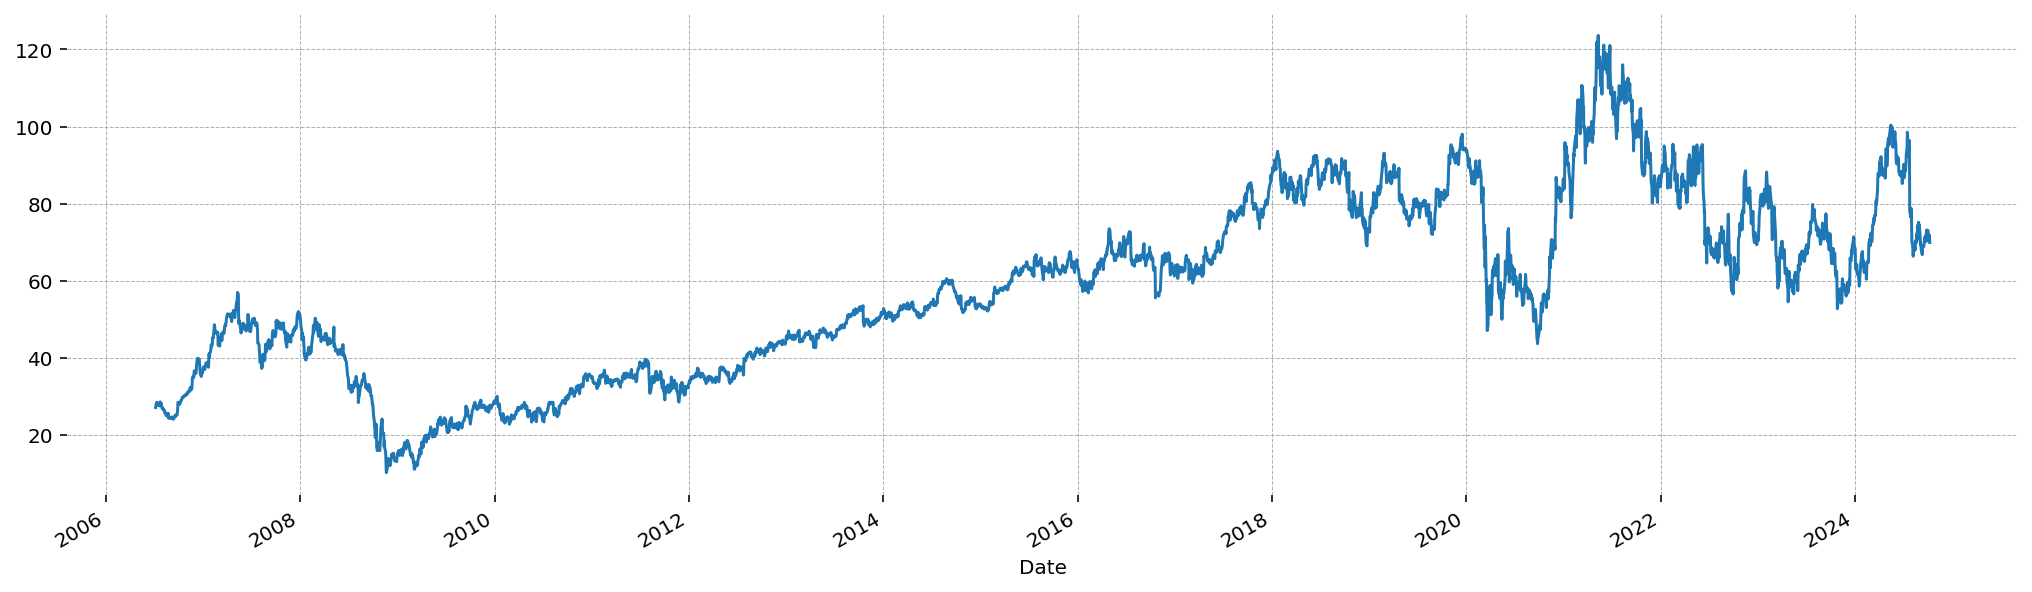

In [260]:
hist['Close'].plot()

In [261]:
companies = ['ASML','RS','TG','KALU']
combined1 = []
for i in companies:
    print(i)
    msft = yf.Ticker(i)
    history = msft.history(period="max")
    close = history['Close']
    combined1.append(close)

ASML
RS
TG
KALU


<Axes: xlabel='Date'>

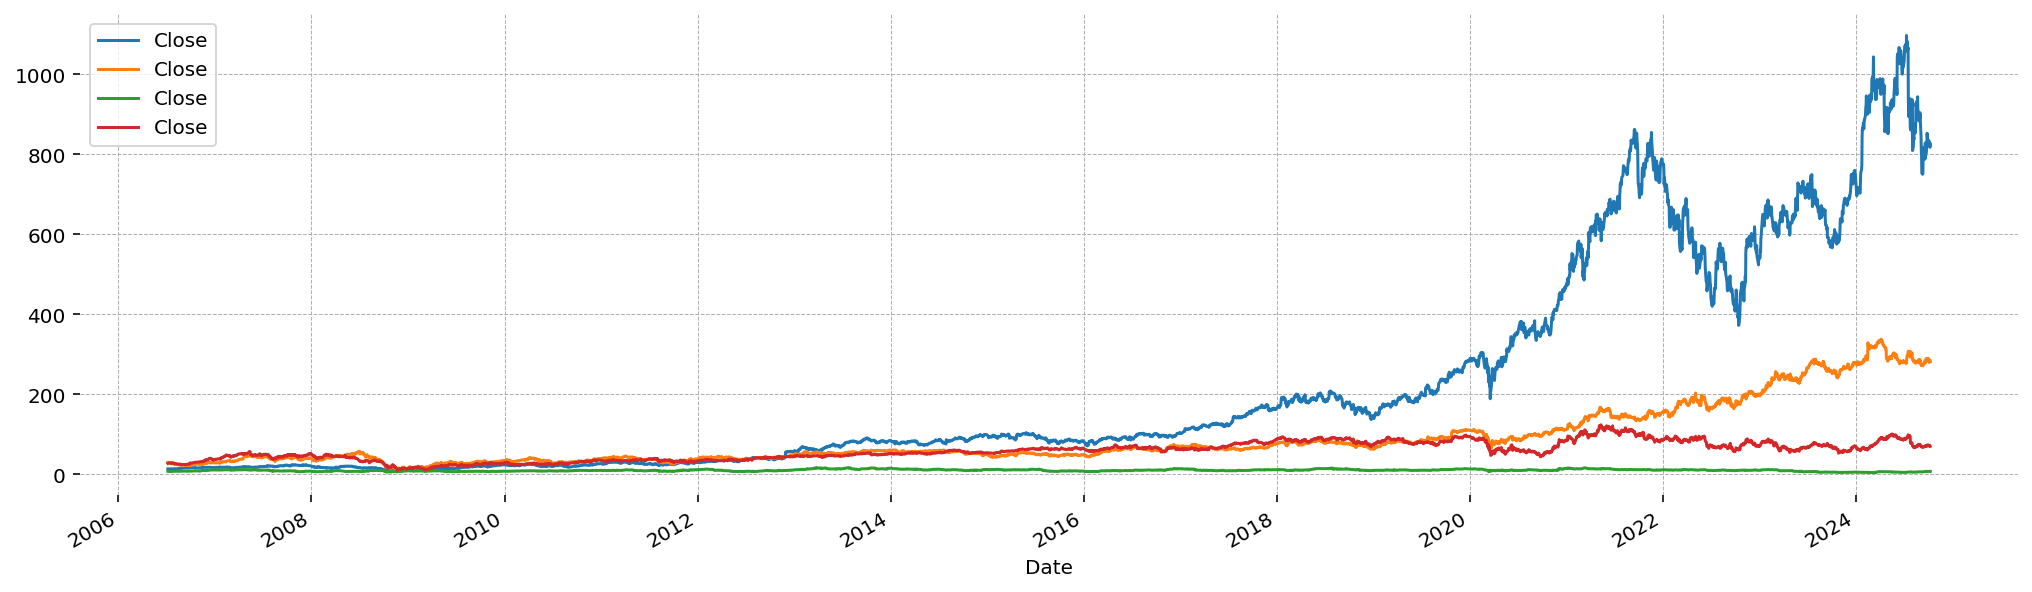

In [262]:
dt1 = pd.concat(combined1, axis=1)
dt1.dropna(inplace=True)
dt1.plot()


## Price of Aluminum and Crude Oil

<Axes: >

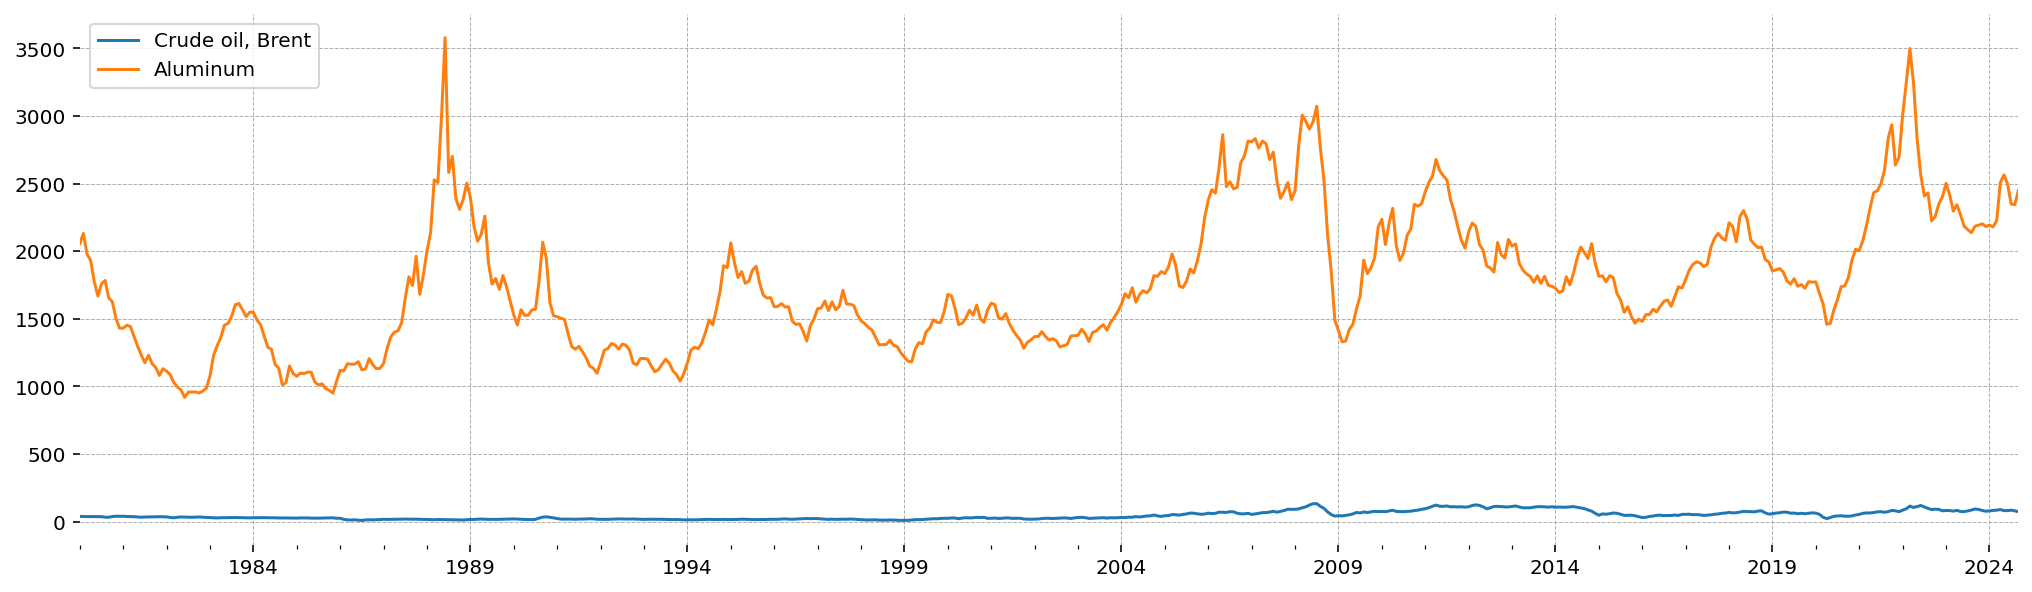

In [263]:
file_path = '../data/CMO-Historical-Data-Monthly.xlsx'

data = pd.read_excel(file_path, sheet_name='Monthly Prices', skiprows=4)
data.drop([0], inplace=True) #units
data.drop(columns=["Unnamed: 0"], inplace=True)

data.index = pd.date_range("1960-01-01", periods=data.shape[0], freq="MS")

data = data.loc['1980-01-01':,:]
data_original = data.copy()
data_original = data_original[['Crude oil, Brent', 'Aluminum']]
data_original['Aluminum'] = data_original['Aluminum'].astype("float")
data_original['Crude oil, Brent'] = data_original['Crude oil, Brent'].astype("float")

data_original.plot()

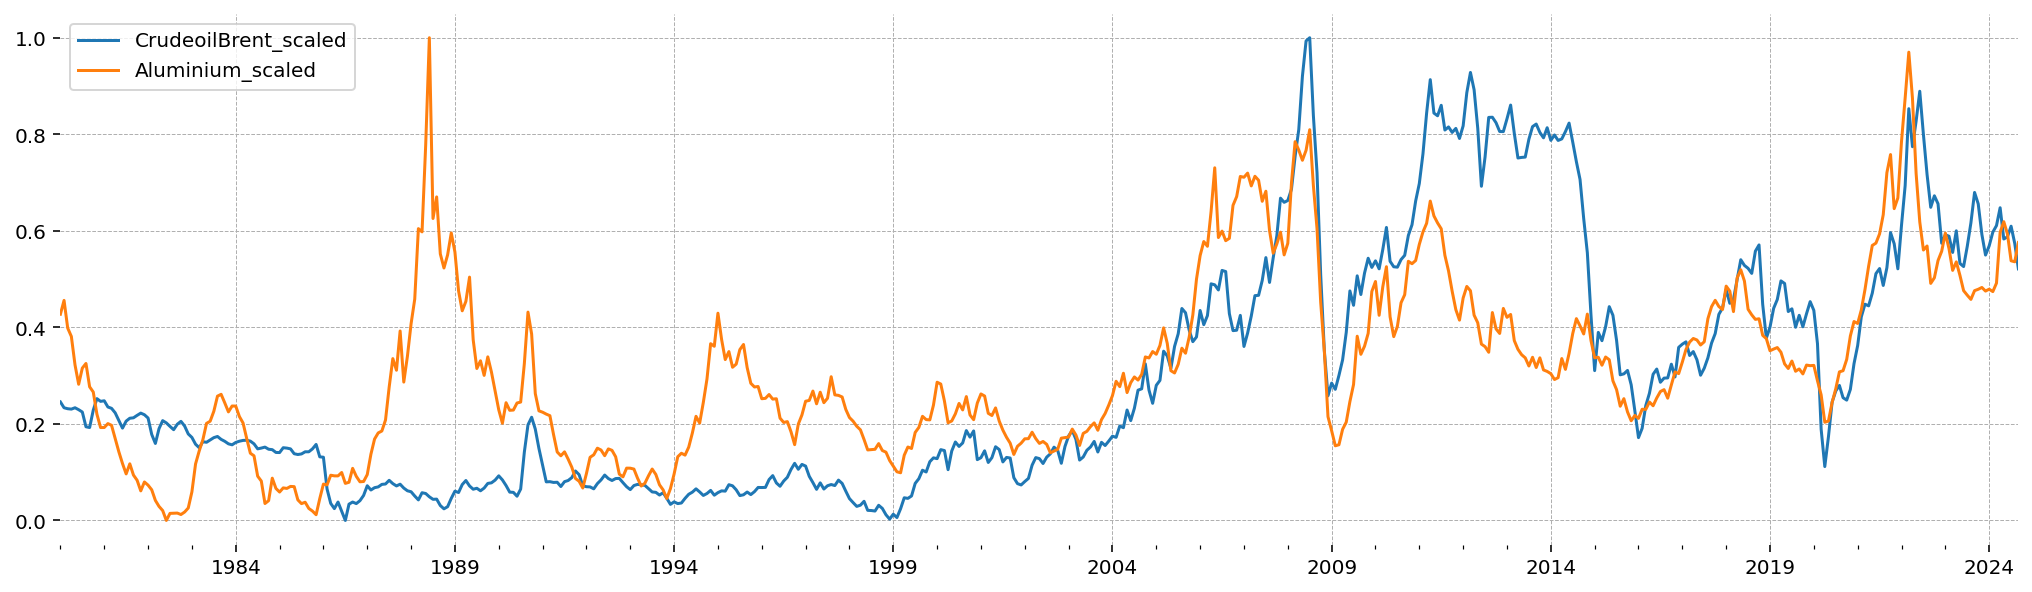

In [264]:
scaler = MinMaxScaler()
data_scaled = scaler.fit(data_original)
data_scaled = scaler.transform(data_original)
data_scaled.dtype
type(data_scaled)
data_scaled.shape

data_original[['CrudeoilBrent_scaled', 'Aluminium_scaled']] = scaler.transform(data_original)
data_original[['CrudeoilBrent_scaled', 'Aluminium_scaled']].plot()
plt.savefig("Aluminum_Oil")



## Producers of Aluminium Inputs
Australia
China
Guinea
Brazil
India

In [265]:
exportsAluminium = pd.read_csv(r"exportsAluminium.csv", index_col=[0])
exportsAluminium = exportsAluminium.sum(axis=0).to_frame()
exportsAluminium['Year'] = exportsAluminium.index
exportsAluminium.rename(columns={0: "Exports"}, inplace=True)
exportsAluminium['Exports_prct'] = np.log(exportsAluminium['Exports']).diff()
exportsAluminium['Year'] = exportsAluminium['Year'].astype("int")

In [266]:
data_original['Year'] = data_original.index.year
data_original.dtypes
data_original.to_csv("tmp2.csv")
data_original

,"Crude oil, Brent",Aluminum,CrudeoilBrent_scaled,Aluminium_scaled,Year
1980-01-01,40.000000,2054.860107,0.245533,0.427241,1980
1980-02-01,38.500000,2131.008545,0.233478,0.455879,1980
1980-03-01,38.250000,1978.378906,0.231468,0.398479,1980
1980-04-01,38.150002,1932.455566,0.230665,0.381208,1980
1980-05-01,38.500000,1775.803711,0.233478,0.322296,1980
...,...,...,...,...,...
2024-05-01,81.995000,2564.540000,0.583051,0.618918,2024
2024-06-01,82.555000,2497.610000,0.587552,0.593747,2024
2024-07-01,85.296000,2349.130000,0.609582,0.537908,2024
2024-08-01,80.863000,2343.670000,0.573953,0.535855,2024


In [267]:

data_new = pd.merge(data_original, exportsAluminium, on="Year")
data_new.dtypes

Crude oil, Brent        float64
Aluminum                float64
CrudeoilBrent_scaled    float64
Aluminium_scaled        float64
Year                      int32
Exports                 float64
Exports_prct            float64
dtype: object

In [268]:

data_new['Aluminum_prct'] = np.log(data_new['Aluminum']).diff()
data_new['CrudeoilBrent_prct'] = np.log(data_new['Crude oil, Brent']).diff()
data_new

,"Crude oil, Brent",Aluminum,CrudeoilBrent_scaled,Aluminium_scaled,Year,Exports,Exports_prct,Aluminum_prct,CrudeoilBrent_prct
0,16.63,2060.55,0.057706,0.429381,1995,72989536.0,NaN,NaN,NaN
1,17.08,1916.15,0.061323,0.375076,1995,72989536.0,NaN,-0.072655,0.026700
2,17.01,1805.07,0.060760,0.333302,1995,72989536.0,NaN,-0.059719,-0.004107
3,18.67,1849.00,0.074102,0.349823,1995,72989536.0,NaN,0.024046,0.093117
4,18.38,1762.69,0.071771,0.317364,1995,72989536.0,NaN,-0.047804,-0.015655
...,...,...,...,...,...,...,...,...,...
331,98.60,2430.79,0.716507,0.568618,2022,326121594.0,0.146871,0.009245,-0.099542
332,90.16,2224.76,0.648674,0.491136,2022,326121594.0,0.146871,-0.088567,-0.089485
333,93.13,2255.54,0.672544,0.502711,2022,326121594.0,0.146871,0.013740,0.032410
334,91.07,2350.72,0.655988,0.538506,2022,326121594.0,0.146871,0.041332,-0.022368


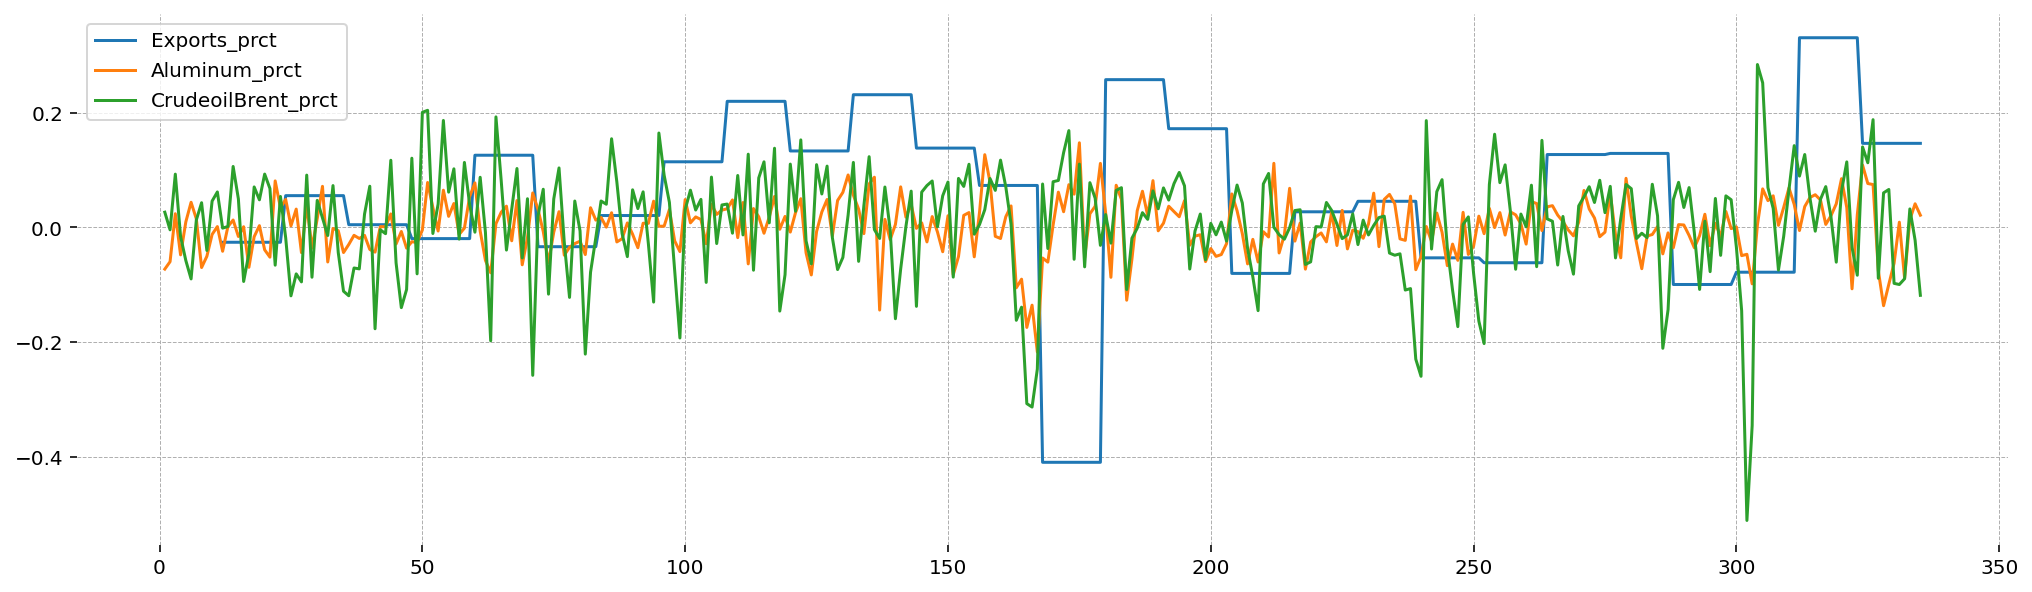

In [269]:
data_new[['Exports_prct', 'Aluminum_prct', 'CrudeoilBrent_prct']].plot()
plt.savefig("ExportsAluminum_OilPrice_AluminiumPrice")